<a href="https://colab.research.google.com/github/RithikaReddy27/stock_market_prediction/blob/main/stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler


In [3]:
!gdown 1cXADPlriRdCGATdAQakzFnop_ukMahI5

Downloading...
From: https://drive.google.com/uc?id=1cXADPlriRdCGATdAQakzFnop_ukMahI5
To: /content/NIFTY.csv
100% 534k/534k [00:00<00:00, 95.4MB/s]


In [4]:
nifty=pd.read_csv("NIFTY.csv")
nifty

,Index Name,Date,Open,High,Low,Close
0,NIFTY 50,04 Nov 2024,24315.75,24316.75,23816.15,23995.35
1,NIFTY 50,01 Nov 2024,24302.75,24368.25,24280.2,24304.35
2,NIFTY 50,31 Oct 2024,24349.85,24372.45,24172.6,24205.35
3,NIFTY 50,30 Oct 2024,24371.45,24498.2,24307.3,24340.85
4,NIFTY 50,29 Oct 2024,24328.85,24484.5,24140.85,24466.85
...,...,...,...,...,...,...
8336,NIFTY 50,10 Jul 1990,-,-,-,288.69
8337,NIFTY 50,09 Jul 1990,-,-,-,289.69
8338,NIFTY 50,06 Jul 1990,-,-,-,289.04
8339,NIFTY 50,05 Jul 1990,-,-,-,284.04


In [6]:
nifty['Date'] = pd.to_datetime(nifty['Date'], format='%d %b %Y')
nifty.set_index('Date', inplace=True)
nifty['Open'] = pd.to_numeric(nifty['Open'], errors='coerce')
nifty['High'] = pd.to_numeric(nifty['High'], errors='coerce')
nifty['Low'] = pd.to_numeric(nifty['Low'], errors='coerce')
nifty.sort_index(ascending=True, inplace=True)
nifty.dropna(inplace=True)


In [8]:
nifty.head()

,Index Name,Open,High,Low,Close
Date,,,,,
1995-11-03,NIFTY 50,994.20,1000.91,992.69,1000.00
1995-11-06,NIFTY 50,1001.53,1001.53,988.92,988.92
1995-11-07,NIFTY 50,987.17,987.17,977.05,978.22
1995-11-08,NIFTY 50,976.28,976.28,962.98,964.01
1995-11-09,NIFTY 50,960.32,960.32,952.13,953.07


# Feature Engineering

In [12]:
return_periods=[1,2,3,4,7,10,11,14,15,16,30,60,90,180,365]
# how mch stock price changed over 1 days,2days,......365days]
#change in price in last n number of days
# Assuming 'nifty' DataFrame is already defined and contains the data
returns_df = nifty.copy()
# Calculate returns for each period and add to returns_df
for period in return_periods:
    returns_df[f"{period}D_return"] = nifty["Close"].pct_change(periods=period)*100

# Display the resulting DataFrame
print(returns_df)

           Index Name      Open      High       Low     Close  1D_return  \
Date                                                                       
1995-11-03   NIFTY 50    994.20   1000.91    992.69   1000.00        NaN   
1995-11-06   NIFTY 50   1001.53   1001.53    988.92    988.92  -1.108000   
1995-11-07   NIFTY 50    987.17    987.17    977.05    978.22  -1.081988   
1995-11-08   NIFTY 50    976.28    976.28    962.98    964.01  -1.452638   
1995-11-09   NIFTY 50    960.32    960.32    952.13    953.07  -1.134843   
...               ...       ...       ...       ...       ...        ...   
2024-10-29   NIFTY 50  24328.85  24484.50  24140.85  24466.85   0.524669   
2024-10-30   NIFTY 50  24371.45  24498.20  24307.30  24340.85  -0.514983   
2024-10-31   NIFTY 50  24349.85  24372.45  24172.60  24205.35  -0.556677   
2024-11-01   NIFTY 50  24302.75  24368.25  24280.20  24304.35   0.409000   
2024-11-04   NIFTY 50  24315.75  24316.75  23816.15  23995.35  -1.271377   

           

In [14]:
returns_df.dropna().head() #remove NaN

,Index Name,Open,High,Low,Close,1D_return,2D_return,3D_return,4D_return,7D_return,10D_return,11D_return,14D_return,15D_return,16D_return,30D_return,60D_return,90D_return,180D_return,365D_return
Date,,,,,,,,,,,,,,,,,,,,
1997-04-25,NIFTY 50,1065.4,1071.05,1062.95,1069.40,0.206147,-0.154054,0.905831,0.829719,6.593571,3.795011,7.922091,6.705248,10.230377,10.440979,-5.131958,8.469419,32.238559,5.368949,6.940000
1997-04-28,NIFTY 50,1068.6,1070.70,1061.20,1065.40,-0.374042,-0.168666,-0.527520,0.528402,4.975860,5.657758,3.406775,5.417306,6.306127,9.818069,-1.232966,5.573998,32.644422,2.166262,7.733689
1997-04-29,NIFTY 50,1063.6,1065.40,1052.80,1057.45,-0.746199,-1.117449,-0.913606,-1.269782,2.149343,4.346754,4.869341,5.639361,4.630683,5.512872,0.518061,3.488941,26.327547,2.008431,8.099405
1997-04-30,NIFTY 50,1081.1,1088.40,1075.95,1079.85,2.118303,1.356298,0.977183,1.185345,1.815010,7.635186,6.557134,8.976688,7.877123,6.847079,0.525973,6.159064,30.534905,4.541406,12.016473
1997-05-02,NIFTY 50,1074.7,1074.70,1063.75,1069.00,-1.004769,1.092250,0.337901,-0.037404,0.868088,5.330574,6.553700,3.756188,7.881724,6.793207,0.234412,6.900000,29.635468,3.556171,12.163849


In [15]:
#create target variable (return after 1 month in fututre)
returns_df["Target_30D_return"]=-nifty["Close"].pct_change(periods=-15)*100
#change in 15 days

In [18]:
returns_df.tail(30)

,Index Name,Open,High,Low,Close,1D_return,2D_return,3D_return,4D_return,7D_return,...,11D_return,14D_return,15D_return,16D_return,30D_return,60D_return,90D_return,180D_return,365D_return,Target_30D_return
Date,,,,,,,,,,,,,,,,,,,,,
2024-09-23,NIFTY 50,25872.55,25956.00,25847.35,25939.05,0.574232,2.058759,2.212586,2.047717,2.166892,...,4.373465,2.607610,2.612278,2.786308,6.449369,7.879349,16.839673,19.723481,49.091709,-3.518728
2024-09-24,NIFTY 50,25921.45,26011.55,25886.85,25940.40,0.005205,0.579467,2.064070,2.217905,2.302763,...,4.026243,2.943406,2.612951,2.617619,6.544543,8.037284,15.785457,20.555738,47.749195,-3.880855
2024-09-25,NIFTY 50,25899.45,26032.80,25871.35,26004.15,0.245756,0.250973,0.826647,2.314899,2.444083,...,3.845877,3.416371,3.196395,2.865128,7.726708,7.713544,15.748394,20.063855,47.757988,-5.067910
2024-09-26,NIFTY 50,26005.40,26250.90,25998.40,26216.05,0.814870,1.062628,1.067888,1.648253,3.137472,...,5.207386,5.488056,4.259080,4.037311,8.583174,8.672745,16.505422,20.751193,48.751564,-5.479992
2024-09-27,NIFTY 50,26248.25,26277.35,26151.40,26178.95,-0.141516,0.672200,0.919608,0.924860,3.157909,...,3.111793,4.982876,5.338774,4.111537,6.673689,7.792189,16.200861,21.688979,47.717565,-5.640791
2024-09-30,NIFTY 50,26061.30,26134.70,25794.10,25810.85,-1.406092,-1.545618,-0.743343,-0.499414,1.554348,...,1.791848,3.073946,3.506721,3.857614,5.038936,6.208093,14.218419,19.800556,44.903831,-5.470515
2024-10-01,NIFTY 50,25788.45,25907.60,25739.20,25796.90,-0.054047,-1.459379,-1.598830,-0.796988,0.023070,...,1.627616,3.525300,3.018238,3.450779,4.445754,6.055990,12.318413,19.326787,44.698788,-5.571402
2024-10-03,NIFTY 50,25452.85,25639.45,25230.30,25250.10,-2.119635,-2.172536,-3.548080,-3.684575,-2.656034,...,-0.662705,-0.546696,1.330942,0.834628,1.937409,3.822076,9.988195,16.643723,42.600745,-3.486561
2024-10-04,NIFTY 50,25181.90,25485.05,24966.80,25014.60,-0.932670,-3.032535,-3.084943,-4.447657,-3.568950,...,-1.430201,-1.348372,-1.474266,0.385859,0.818572,2.379549,9.079492,14.250350,41.644324,-3.448190


In [19]:
data_clean=returns_df.dropna()
data_clean.head() #drop NaN values

,Index Name,Open,High,Low,Close,1D_return,2D_return,3D_return,4D_return,7D_return,...,11D_return,14D_return,15D_return,16D_return,30D_return,60D_return,90D_return,180D_return,365D_return,Target_30D_return
Date,,,,,,,,,,,,,,,,,,,,,
1997-04-25,NIFTY 50,1065.4,1071.05,1062.95,1069.40,0.206147,-0.154054,0.905831,0.829719,6.593571,...,7.922091,6.705248,10.230377,10.440979,-5.131958,8.469419,32.238559,5.368949,6.940000,-1.770080
1997-04-28,NIFTY 50,1068.6,1070.70,1061.20,1065.40,-0.374042,-0.168666,-0.527520,0.528402,4.975860,...,3.406775,5.417306,6.306127,9.818069,-1.232966,5.573998,32.644422,2.166262,7.733689,-1.384593
1997-04-29,NIFTY 50,1063.6,1065.40,1052.80,1057.45,-0.746199,-1.117449,-0.913606,-1.269782,2.149343,...,4.869341,5.639361,4.630683,5.512872,0.518061,3.488941,26.327547,2.008431,8.099405,-1.482726
1997-04-30,NIFTY 50,1081.1,1088.40,1075.95,1079.85,2.118303,1.356298,0.977183,1.185345,1.815010,...,6.557134,8.976688,7.877123,6.847079,0.525973,6.159064,30.534905,4.541406,12.016473,-4.112032
1997-05-02,NIFTY 50,1074.7,1074.70,1063.75,1069.00,-1.004769,1.092250,0.337901,-0.037404,0.868088,...,6.553700,3.756188,7.881724,6.793207,0.234412,6.900000,29.635468,3.556171,12.163849,-3.414917


In [21]:
#define feature nd target
x=data_clean[[f"{period}D_return" for period in return_periods]]
y=data_clean["Target_30D_return"]

In [22]:
x.head()

,1D_return,2D_return,3D_return,4D_return,7D_return,10D_return,11D_return,14D_return,15D_return,16D_return,30D_return,60D_return,90D_return,180D_return,365D_return
Date,,,,,,,,,,,,,,,
1997-04-25,0.206147,-0.154054,0.905831,0.829719,6.593571,3.795011,7.922091,6.705248,10.230377,10.440979,-5.131958,8.469419,32.238559,5.368949,6.940000
1997-04-28,-0.374042,-0.168666,-0.527520,0.528402,4.975860,5.657758,3.406775,5.417306,6.306127,9.818069,-1.232966,5.573998,32.644422,2.166262,7.733689
1997-04-29,-0.746199,-1.117449,-0.913606,-1.269782,2.149343,4.346754,4.869341,5.639361,4.630683,5.512872,0.518061,3.488941,26.327547,2.008431,8.099405
1997-04-30,2.118303,1.356298,0.977183,1.185345,1.815010,7.635186,6.557134,8.976688,7.877123,6.847079,0.525973,6.159064,30.534905,4.541406,12.016473
1997-05-02,-1.004769,1.092250,0.337901,-0.037404,0.868088,5.330574,6.553700,3.756188,7.881724,6.793207,0.234412,6.900000,29.635468,3.556171,12.163849


In [23]:
y.head()

,Target_30D_return
Date,
1997-04-25,-1.770080
1997-04-28,-1.384593
1997-04-29,-1.482726
1997-04-30,-4.112032
1997-05-02,-3.414917


# Train-Test split

In [26]:
#split last 1 year as test data
split_date=x.index.max()-pd.DateOffset(years=1)
x_train=x[x.index<split_date]
x_test=x[x.index>=split_date]
y_train=y[y.index<split_date]
y_test=y[y.index>=split_date]

In [27]:
model=SVR(kernel='rbf')
model.fit(x_train,y_train)

#predict
y_pred=model.predict(x_test)

In [ ]:
##convert it into binary classification dataset

In [28]:
#convert to binary classification (pos:1,negative:0)
y_test_binary=(y_test>0).astype(int)
y_pred_binary=(y_pred>0).astype(int)

In [29]:
y_test_binary

,Target_30D_return
Date,
2023-10-16,0
2023-10-17,0
2023-10-18,0
2023-10-19,0
2023-10-20,0
...,...
2024-10-08,0
2024-10-09,0
2024-10-10,0


In [31]:
# Assuming y_test, y_pred, y_test_binary, and y_pred_binary are defined
y_results_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Actual_Class": y_test_binary,
    "Predicted_Class": y_pred_binary
}, index=y_test.index)

# Display the last 25 rows of the DataFrame
print(y_results_df.tail(25))


              Actual  Predicted  Actual_Class  Predicted_Class
Date                                                          
2024-09-09  3.387916   0.560615             1                1
2024-09-10  2.929809   0.543614             1                1
2024-09-11  1.313460   0.479679             1                1
2024-09-12 -1.496326   0.636328             0                1
2024-09-13 -2.261476   0.637913             0                1
2024-09-16 -1.481621   0.447484             0                1
2024-09-17 -1.747662   0.008030             0                1
2024-09-18 -1.516494  -0.104914             0                0
2024-09-19 -1.808787  -0.027964             0                0
2024-09-20 -2.638496  -0.091027             0                0
2024-09-23 -3.518728  -0.033507             0                0
2024-09-24 -3.880855   0.013826             0                1
2024-09-25 -5.067910  -0.213407             0                0
2024-09-26 -5.479992  -0.119905             0          

#Evaluation Metrix

In [32]:
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuarcy: {accuracy:.2f}")


Accuarcy: 0.73


In [33]:
# Compute the average actual return grouped by predicted class
average_actual_by_class = y_results_df.groupby("Predicted_Class")["Actual"].mean()

# Display the average actual return by predicted class
print("Average Actual Return by Predicted Class:")
print(average_actual_by_class)


Average Actual Return by Predicted Class:
Predicted_Class
0   -2.144021
1    1.741150
Name: Actual, dtype: float64


In [34]:
(1.741150/3)*52

30.179933333333334

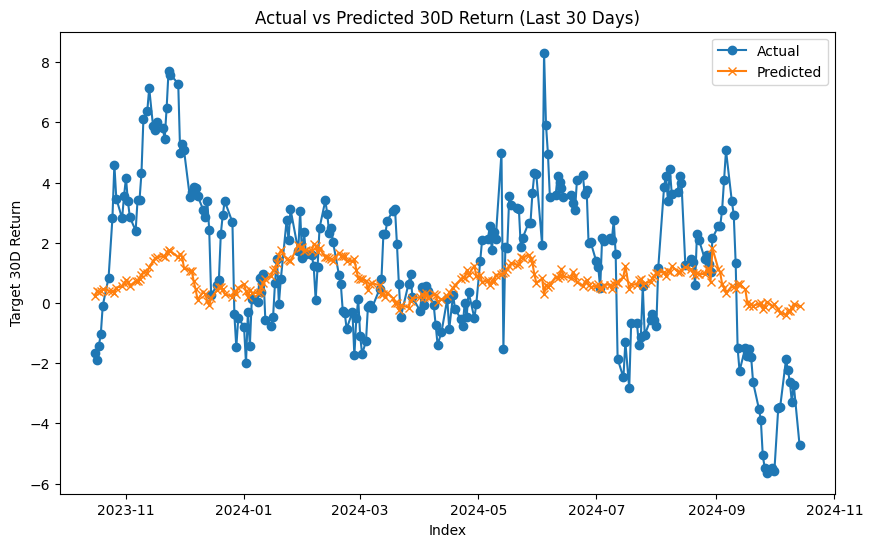

In [35]:
# Select last 30 days for plotting
last_30_days = y_test.index[-350:]
y_test_last_30 = y_test.loc[last_30_days]
y_pred_last_30 = pd.Series(y_pred, index=y_test.index).loc[last_30_days]

# Plot Index vs Target for both Actual and Prediction (Last 30 Days)
plt.figure(figsize=(10,6))
plt.plot(y_test_last_30.index, y_test_last_30, label="Actual", marker='o')
plt.plot(y_pred_last_30.index, y_pred_last_30, label="Predicted", marker='x')
plt.xlabel("Index")
plt.ylabel("Target 30D Return")
plt.title("Actual vs Predicted 30D Return (Last 30 Days)")
plt.legend()
plt.show()